# PROBLEM STATEMENT

*Implementation of Bagging concept with Decision Trees*

1. Import Libraries
2. Load the Dataset and Pre-Processing
3. Implement Bagging
4. Model Predictions and Accuracy

The Dataset is a Red-Wine Quality Dataset

### Module 1 : Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve

<hr>

### Module 2 : Loading the Dataset, Pre-Processing and Data Preparation

In [ ]:
df = pd.read_csv("./winequality-red.csv")

print(df['quality'].value_counts(), end=" ")

def quality_to_label(quality):
    if quality <= 5:
        return 0
    else:
        return 1

df['quality_class'] = df['quality'].apply(quality_to_label)

df.head(2)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_class
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0


Basic Pre-Processing

In [ ]:
print(df.shape)
df = df.dropna(axis=0, how='any')
print(df.shape)

(1599, 13)
(1599, 13)


Splitting of Dataset

In [ ]:
X = df.drop(['quality','quality_class'], axis = 'columns')
Y = df['quality_class']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print(X_train.shape, end="\t")
print(y_train.shape)

print(X_test.shape, end="\t")
print(y_test.shape)

(1119, 11)	(1119,)
(480, 11)	(480,)


Min Max Scaling of 'X' Columns

In [ ]:
ms = MinMaxScaler()

X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

<hr>

### Implementation of Bagging on Decision Tree CLassification

In [ ]:
model = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(),
    n_estimators = 10,
    random_state = 101
)

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=101)

<hr>

### Model Predictions and Accuracy

Predictions

In [ ]:
preds = model.predict(X_test)

print(preds[0:20])

[0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0]


Accuracy Scores

In [ ]:
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1score = f1_score(y_test, preds)
print(f"ACCURACY : {accuracy} \t PRECISION : {precision} \t RECALL : {recall} \t F1 SCORE : {f1score}")

ACCURACY : 0.7729166666666667 	 PRECISION : 0.8185483870967742 	 RECALL : 0.7602996254681648 	 F1 SCORE : 0.7883495145631068


ROC Curve

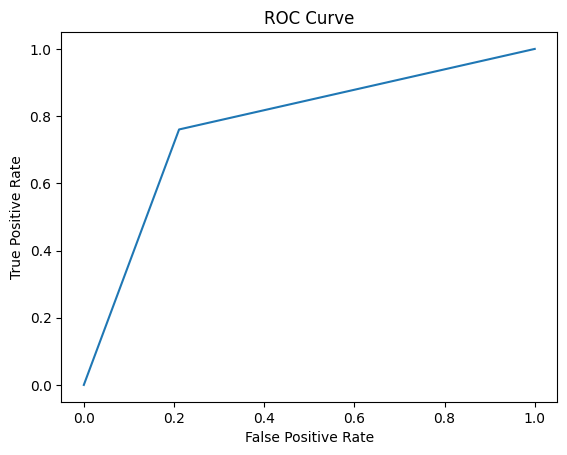

In [ ]:
fpr, tpr, _ = roc_curve(y_test, preds)

plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

<hr><hr>